# 📊 Daily KPI Time-Series Analysis — EDA, Correlation, Forecasting (Prophet + LSTM)
Analyze and forecast business KPIs such as sales, users, and marketing performance using statistical and neural models.

In [2]:
pip install prophet


  Using cached stanio-0.5.1-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   --------------- ------------------------ 4.7/12.1 MB 22.9 MB/s eta 0:00:01
   -------------------------------- ------- 9.7/12.1 MB 23.8 MB/s eta 0:00:01
   ---------------------------------------- 12.1/12.1 MB 22.5 MB/s  0:00:00
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 1.3/1.3 MB 16.8 MB/s  0:00:00
Using cached stanio-0.5.1-py3-none-any.whl (8.1 kB)

   ---------- ----------------------------- 1/4 [holidays]
   ---------- ----------------------------- 1/4 [holidays]
   ---------- ----------------------------- 1/4 [holidays]
   ---------- ----------------------------- 1/4 [holidays]
   ---------- ----------------------------- 1/4 [holidays]
   ---------- ----------------------------- 1/4 [holidays]
   ---------- ----------------------------- 1/4 [holidays]
   ---------- ------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# STEP 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
sns.set(style='whitegrid')
pd.set_option('display.max_columns', None)


C:\Users\akasar\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\akasar\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\akasar\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/fram

In [4]:
# STEP 2: Load dataset
df = pd.read_csv('D:/Desktop/GenAI-Powered Analytics Platform/Data/raw/daily_kpi_data.csv', parse_dates=['date'])
print('Shape:', df.shape)
df.head()


Shape: (2920, 9)


,date,region,total_sales,active_users,new_customers,marketing_spend,website_traffic,conversion_rate,customer_satisfaction
0,2023-01-01,East,48667.02,1479,61,2552.921,8714,0.0258,0.9661
1,2023-01-01,North,50184.99,2608,181,1745.597,9477,0.0232,0.9688
2,2023-01-01,South,61302.11,2021,76,3742.634,20596,0.0259,0.9641
3,2023-01-01,West,28004.12,1523,48,2582.923,14399,0.0291,0.9477
4,2023-01-02,East,101215.24,2956,193,4152.180,16309,0.0216,0.9469


Date Range: 2023-01-01 00:00:00 to 2024-12-30 00:00:00

Missing values:
 date                     0
region                   0
total_sales              0
active_users             0
new_customers            0
marketing_spend          0
website_traffic          0
conversion_rate          0
customer_satisfaction    0
dtype: int64


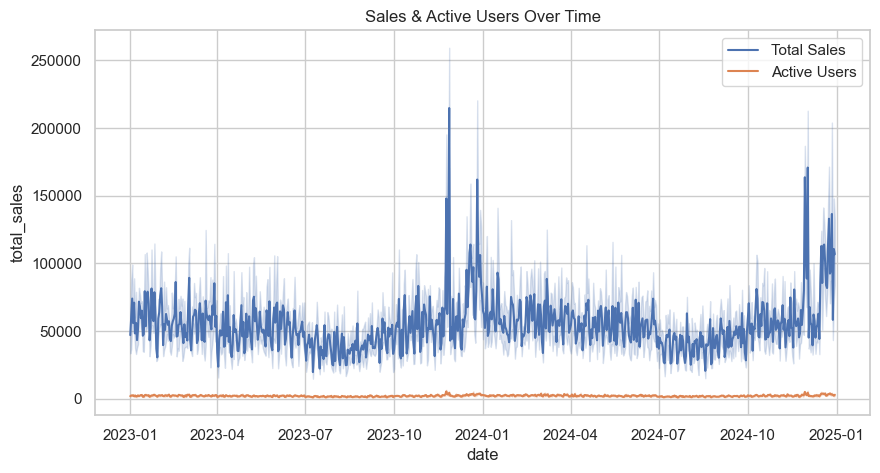

In [5]:
# STEP 3: Basic EDA
print('Date Range:', df['date'].min(), 'to', df['date'].max())
print('\nMissing values:\n', df.isnull().sum())

plt.figure(figsize=(10,5))
sns.lineplot(x='date', y='total_sales', data=df, label='Total Sales')
sns.lineplot(x='date', y='active_users', data=df, label='Active Users')
plt.title('Sales & Active Users Over Time')
plt.legend()
plt.show()


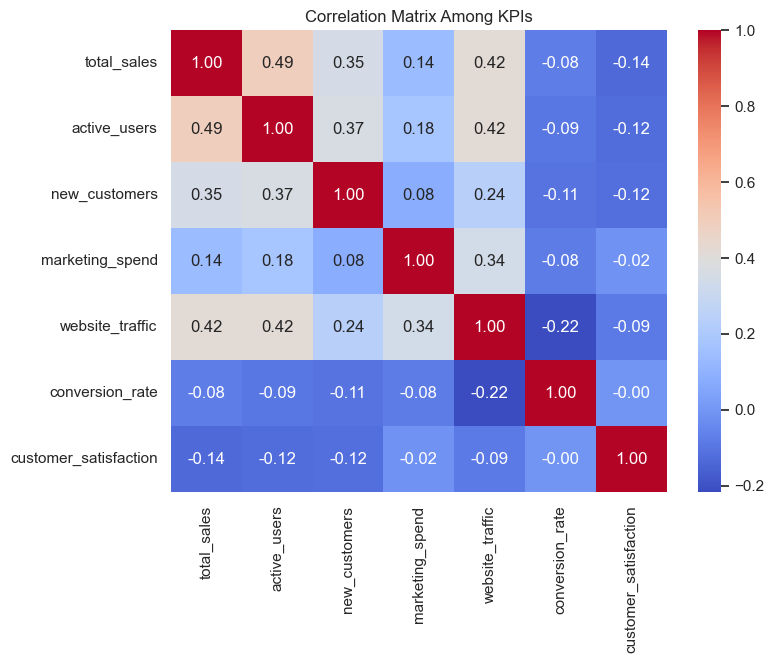

In [6]:
# STEP 4: Correlation Heatmap
num_cols = ['total_sales','active_users','new_customers','marketing_spend','website_traffic','conversion_rate','customer_satisfaction']
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Among KPIs')
plt.show()


14:29:43 - cmdstanpy - INFO - Chain [1] start processing
14:29:44 - cmdstanpy - INFO - Chain [1] done processing


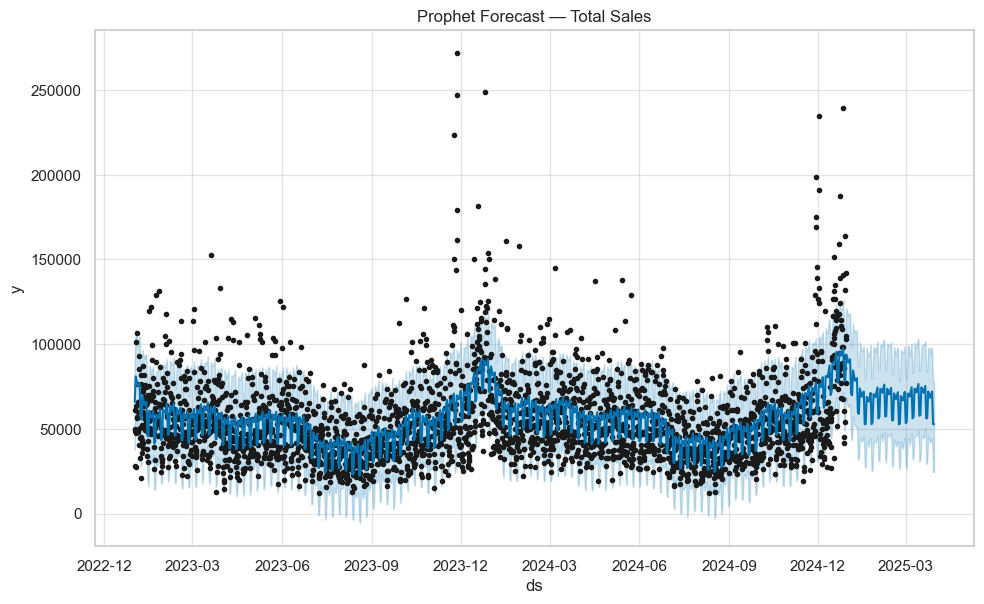

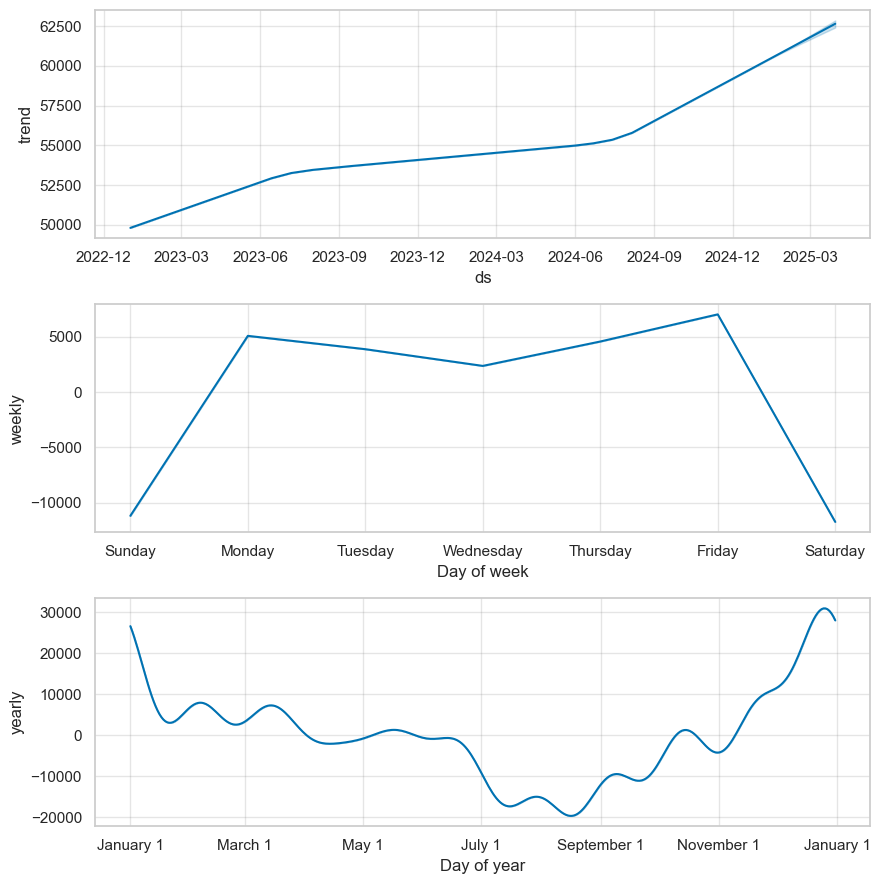

In [7]:
# STEP 5: Prophet Forecasting — Total Sales
sales_df = df[['date','total_sales']].rename(columns={'date':'ds','total_sales':'y'})
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model.fit(sales_df)
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)
fig1 = model.plot(forecast)
plt.title('Prophet Forecast — Total Sales')
plt.show()
fig2 = model.plot_components(forecast)
plt.show()


C:\Users\akasar\AppData\Local\Temp\1\ipykernel_28176\4177435650.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = daily_sales.asfreq('D').fillna(method='ffill')
C:\Users\akasar\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0118 - val_loss: 0.0030
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0073 - val_loss: 0.0029
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0069 - val_loss: 0.0031
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0067 - val_loss: 0.0030
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0065 - val_loss: 0.0029
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0067 - val_loss: 0.0029
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0066 - val_loss: 0.0051
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0074 - val_loss: 0.0031
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0067 - val_loss: 0.0029
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0065 - val_loss: 0.0025
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0067 - val_loss: 0.0024
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0

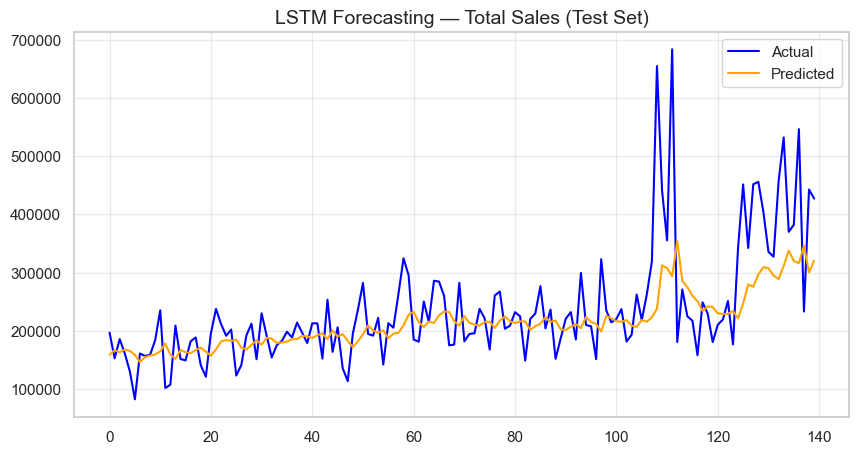

In [9]:
# STEP 6: LSTM Forecasting (Fixed Version)

# 1️⃣ Ensure date is datetime and aggregate daily
df['date'] = pd.to_datetime(df['date'])
daily_sales = df.groupby('date')['total_sales'].sum().sort_index()

# 2️⃣ Create a continuous daily time series
series = daily_sales.asfreq('D').fillna(method='ffill')

# 3️⃣ Scale the data
data = series.values.reshape(-1, 1)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# 4️⃣ Create sequences for supervised learning
def create_sequences(data, seq_len=30):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i + seq_len])
        y.append(data[i + seq_len])
    return np.array(X), np.array(y)

SEQ_LEN = 30
X, y = create_sequences(data_scaled, SEQ_LEN)

# 5️⃣ Train-test split
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 6️⃣ Build LSTM model
model_lstm = Sequential([
    LSTM(64, input_shape=(SEQ_LEN, 1), return_sequences=False),
    Dropout(0.2),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')

# 7️⃣ Train model
history = model_lstm.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)

# 8️⃣ Predictions and inverse transform
preds = model_lstm.predict(X_test)
preds_inv = scaler.inverse_transform(preds)
y_test_inv = scaler.inverse_transform(y_test)

# 9️⃣ Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test_inv)), y_test_inv, label='Actual', color='blue')
plt.plot(range(len(preds_inv)), preds_inv, label='Predicted', color='orange')
plt.title('LSTM Forecasting — Total Sales (Test Set)', fontsize=14)
plt.legend()
plt.grid(alpha=0.4)
plt.show()

## ✅ Insights & Next Steps
- Prophet reveals seasonality trends and recurring patterns in sales and traffic.
- LSTM captures complex dependencies — useful for multi-KPI forecasting.
- Next: Add marketing spend, users, or satisfaction as regressors in Prophet.
- Extend to multi-variate deep models (VAR, Seq2Seq, or Transformers).
